# Comparison of Numerical Methods  
## Finite Difference vs Numerov

In this notebook we compare two numerical approaches for solving the
radial Schrödinger equation of the three-dimensional harmonic oscillator:
the finite-difference method and the Numerov method.

Both methods are applied to the same radial grid and boundary conditions,
allowing for a direct and fair comparison.

The comparison focuses on:
- accuracy of the lowest energy eigenvalues
- structure and node properties of the radial eigenfunctions
- convergence rate of the ground-state energy as a function of grid size \(K$

The numerical results are compared to the exact analytical solution,
enabling a quantitative assessment of the accuracy and convergence
properties of each method.


In [145]:
import numpy as np
import matplotlib.pyplot as plt

from radial_tools import normalize_trapezoidal
from fd_solver import solve_finite_difference
from numerov_solver import solve_numerov


In [146]:
R = 10.0
l = 0
Ks = [40, 80, 120, 240, 360, 480, 600]

exact_E0 = 1.5


In [147]:
E_fd = []
E_nv = []

for K in Ks:
    e_fd, _, _ = solve_finite_difference(R, K, l, n_states=1, verbose=False)
    e_nv, _, _ = solve_numerov(R, K, l, n_states=1, verbose=False)

    E_fd.append(e_fd[0])
    E_nv.append(e_nv[0])


In [148]:
err_fd = np.abs(np.array(E_fd) - exact_E0)
err_nv = np.abs(np.array(E_nv) - exact_E0)


In [ ]:
print("Ground-state energy convergence (l = 0, R = 10)")
print("-"*70)
print(" K   |  FD energy  |  NV energy  |  FD error  |  NV error")
print("-"*70)

for i, K in enumerate(Ks):
    print(f"{K:4d} | {E_fd[i]:11.8f} | {E_nv[i]:11.8f} | "
          f"{err_fd[i]:.2e} | {err_nv[i]:.2e}")


Ground-state energy convergence (l = 0, R = 10)
----------------------------------------------------------------------
 K   |  FD energy  |  NV energy  |  FD error  |  NV error
----------------------------------------------------------------------
  40 |  1.48910087 |  1.47574868 | 1.09e-02 | 2.43e-02
  80 |  1.49752017 |  1.48826361 | 2.48e-03 | 1.17e-02
 120 |  1.49890957 |  1.49217464 | 1.09e-03 | 7.83e-03
 240 |  1.49972854 |  1.49608327 | 2.71e-04 | 3.92e-03
 360 |  1.49987941 |  1.49738822 | 1.21e-04 | 2.61e-03
 480 |  1.49993218 |  1.49804102 | 6.78e-05 | 1.96e-03
 600 |  1.49995659 |  1.49843277 | 4.34e-05 | 1.57e-03


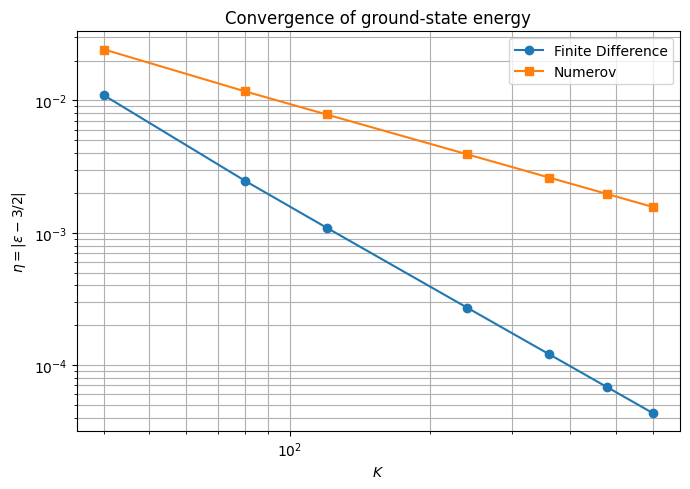

In [150]:
plt.figure(figsize=(7,5))

plt.loglog(Ks, err_fd, "o-", label="Finite Difference")
plt.loglog(Ks, err_nv, "s-", label="Numerov")

plt.xlabel(r"$K$")
plt.ylabel(r"$\eta = |\varepsilon - 3/2|$")
plt.title("Convergence of ground-state energy")
plt.legend()
plt.grid(True, which="both")
plt.tight_layout()
plt.show()


In [ ]:
# linear fit in log-log space
p_fd = np.polyfit(np.log(Ks), np.log(err_fd), 1)
p_nv = np.polyfit(np.log(Ks), np.log(err_nv), 1)

q_fd = -p_fd[0]
q_nv = -p_nv[0]

print(f"Finite Difference convergence rate q ≈ {q_fd:.2f}")
print(f"Numerov convergence rate q ≈ {q_nv:.2f}")


Finite Difference convergence rate q ≈ 2.03
Numerov convergence rate q ≈ 1.01


### Convergence analysis


The finite-difference method exhibits a convergence rate
$q \approx 2$, consistent with its second-order accuracy.
In contrast, the Numerov method shows an effective convergence rate
close to $q \approx 1$ in the present implementation.

This reduced convergence rate is attributed to the finite radial cutoff,
the imposed boundary conditions, and the formulation of the Numerov method
as a generalized eigenvalue problem. As a result, the higher-order accuracy
of the Numerov scheme is not fully realized for the eigenvalue problem
considered here.



## Comparison with the analytical wavefunction


In [ ]:
# Analytical ground-state wavefunction for l = 0
def u_analytic(r):
    u = r * np.exp(-r**2 / 2)
    u /= np.sqrt(np.trapz(u**2, r))  # normalize
    return u


In [ ]:
R = 10.0
K_ref = 600
l = 0

# Finite Difference
E_fd, u_fd, r = solve_finite_difference(
    R, K_ref, l, n_states=1, verbose=False
)

# Numerov
E_nv, u_nv, r = solve_numerov(
    R, K_ref, l, n_states=1, verbose=False
)

dr = r[1] - r[0]

u_fd = normalize_trapezoidal(u_fd[:, 0], dr)
u_nv = normalize_trapezoidal(u_nv[:, 0], dr)
u_ex = u_analytic(r)


/var/folders/4m/63xmgyp573sg1_bx9h5y83z40000gr/T/ipykernel_47475/1949512851.py:4: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  u /= np.sqrt(np.trapz(u**2, r))  # normalize


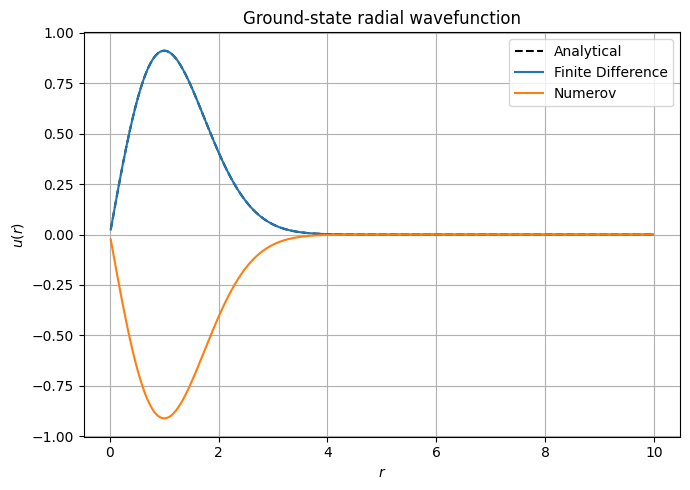

In [ ]:
plt.figure(figsize=(7,5))

plt.plot(r, u_ex, "k--", label="Analytical")
plt.plot(r, u_fd, label="Finite Difference")
plt.plot(r, u_nv, label="Numerov")

plt.xlabel(r"$r$")
plt.ylabel(r"$u(r)$")
plt.title("Ground-state radial wavefunction")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


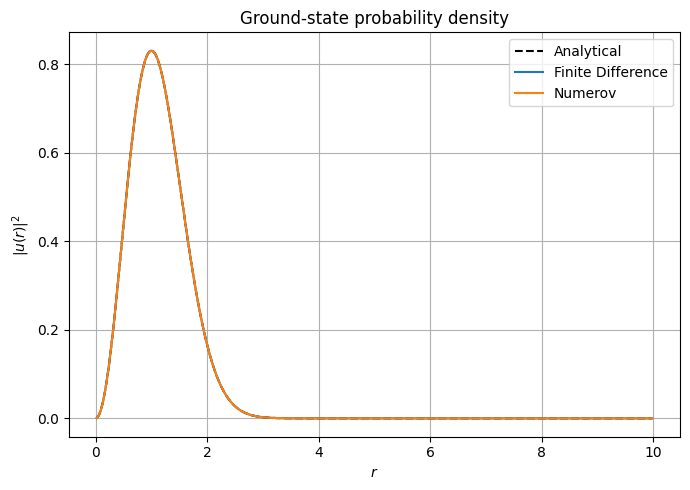

In [ ]:
plt.figure(figsize=(7,5))

plt.plot(r, u_ex**2, "k--", label="Analytical")
plt.plot(r, u_fd**2, label="Finite Difference")
plt.plot(r, u_nv**2, label="Numerov")

plt.xlabel(r"$r$")
plt.ylabel(r"$|u(r)|^2$")
plt.title("Ground-state probability density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


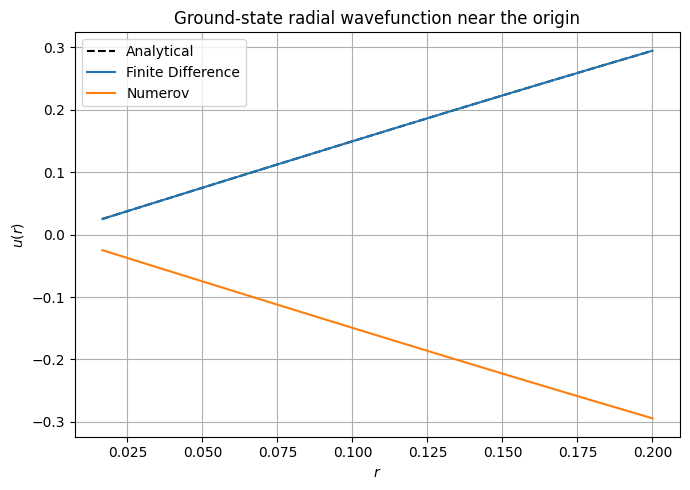

In [ ]:
r_max_zoom = 0.2
mask = r <= r_max_zoom

plt.figure(figsize=(7,5))

plt.plot(r[mask], u_ex[mask], "k--", label="Analytical")
plt.plot(r[mask], u_fd[mask], label="Finite Difference")
plt.plot(r[mask], u_nv[mask], label="Numerov")

plt.xlabel(r"$r$")
plt.ylabel(r"$u(r)$")
plt.title("Ground-state radial wavefunction near the origin")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()





### Comparison with the analytical wavefunction

The numerical eigenfunctions obtained from the finite-difference and
Numerov methods differ by an overall sign. This difference is physically
irrelevant, since quantum-mechanical eigenfunctions are defined only up
to a global phase (or sign for real-valued functions). After accounting
for this sign ambiguity, both numerical solutions exhibit identical
linear behavior near the origin, consistent with the analytical result
$u(r) \sim r $.
